# Distinction des fleurs d'Iris
## Avec Grid Search CV

### Chargement des données d'Iris

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

### Affichage des données grâce au package Matplotlib

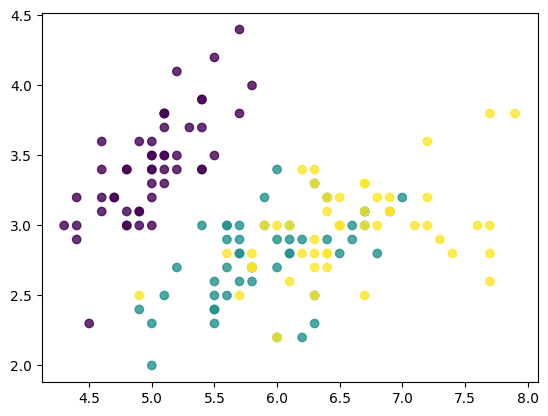

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

### Utilisation du Train Test Split pour la création du train_set et du test_set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Utilisation du Grid Search CV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
#Création du dictionnaire qui contient les différents paramètres à régler
param_grid = {
    'n_neighbors' : np.arange(1,20,1),
    'metric' : ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

#Entraînement du modèle sur les différents nombres de neighbors et metrics
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

### Observation du résultat de l'entraînement 

In [29]:
best_scrore = grid.best_score_
best_params = grid.best_params_
print(f"le meilleur score est: {best_scrore} pour les paramètres: {best_params}")

le meilleur score est: 0.9666666666666668 pour les paramètres: {'metric': 'euclidean', 'n_neighbors': 17}


### Sauvegarde et Test du modèle

In [30]:
# Sauvegarde
model = grid.best_estimator_

# Teste du modèle sur le test_train
score = model.score(X_test, y_test)
score

1.0

### Evaluation de la performance de mon model avec Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

on obtient une matrice carré de dimension 3X3 puisqu'on a 3 classes dans le dataset
et chaque fleur est bien rangée dans sa classe respective

### Courbes d'apprentissage avec Learning curve

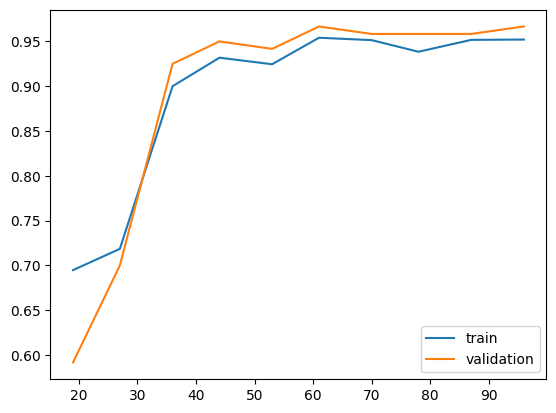

In [38]:
from sklearn.model_selection import learning_curve

N,train_score,val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2,1.0,10))

plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()
plt.show()